# Исследование данных из реестра аккредитованных лиц Росаккредитации

<br>

Скачаем с сайта Федеральной службы по аккредитации Росаккредитация датасет с реестром аккредитованных лиц по адресу https://fsa.gov.ru/opendata/7736638268-ral_ei/data-20220204-structure-20220209.7z

Распакуем архив, посмотрим содержимое файла.

<a id="opening"></a>
## Изучение данных из файла

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymystem3 import Mystem
from collections import Counter

Прочитаем имеющийся файл, посмотрим содержимое первых 5 строк, информацию и наличие дубликатов.

In [2]:
ral = pd.read_csv(r"C:\Users\79822\AppData\Local\Programs\Python\Python310\datasets\ral_01022022.csv")

In [3]:
def description(list_df, list_names): #напишем функцию для краткого описания датафреймов
    assert len(list_df) == len(list_names)
    for num in range(len(list_df)):
        print('Первые 5 строк и сводная информация по файлу', list_names[num])
        display(list_df[num].head().T)
        print(list_df[num].info())
        print(f'Количество дубликатов в датафрейме {list_names[num]} равно {list_df[num].duplicated().sum()}')
        print('_'*100)

In [4]:
description([ral], ['ral'])

Первые 5 строк и сводная информация по файлу ral


,0,1,2,3,4
Status,Действует,Действует,Действует,Прекращен,Прекращен
Type_AL,Испытательная лаборатория (ГОСТ ИСО/МЭК 17025),Испытательная лаборатория (ГОСТ ИСО/МЭК 17025),Испытательная лаборатория (ГОСТ ИСО/МЭК 17025),Орган по сертификации,Испытательная лаборатория (ГОСТ ИСО/МЭК 17025)
Reg_number,РОСС RU.0001.515511,РОСС RU.0001.513608,RA.RU.513220,РОСС RU.0001.13ИФ51,РОСС RU.0001.22СА43
On_reg_dat,1015-02-27,2006-06-14,2010-03-19,2010-04-12,2010-08-02
Akkred_order_num,А-3495,NaN,NaN,NaN,NaN
Akkred_order_dat,2013-09-26,NaN,2015-04-01,2010-04-12,2010-06-18
Full name_AL,Испытательная лаборатория охраны окружающей ср...,Испытательный лабораторный центр филиала Федер...,Испытательная лаборатория по Пермскому краю фи...,Орган по сертификации систем менеджмента качес...,Кольский испытательный центр строительных мате...
Short name_AL,NaN,"ИЛЦ ФБУЗ ""Центр гигиены и эпидемиологии в Сама...",Испытательная лаборатория по Пермскому краю фи...,Орган по сертификации систем менеджмента качес...,не указано
FIO_ruk_AL,Уварова Е. В.,Горбунов Александр Николаевич,Аснина Наталия Владимировна,Савельев Андрей Геннадьевич,Крашенинников Олег Николаевич
Address_AL,"623406, РОССИЯ, Свердловская обл, Каменск-Урал...","446304, РОССИЯ, Самарская область, Отрадный, у...","614068, РОССИЯ, Пермский край, Пермь, ул. Мона...","127055, РОССИЯ, город Москва, ул. Образцова, д...","184209, РОССИЯ, Мурманская область, Апатиты, м..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13278 entries, 0 to 13277
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status             13278 non-null  object 
 1   Type_AL            13278 non-null  object 
 2   Reg_number         13235 non-null  object 
 3   On_reg_dat         13085 non-null  object 
 4   Akkred_order_num   11589 non-null  object 
 5   Akkred_order_dat   12634 non-null  object 
 6   Full name_AL       13148 non-null  object 
 7   Short name_AL      9941 non-null   object 
 8   FIO_ruk_AL         12324 non-null  object 
 9   Address_AL         12904 non-null  object 
 10  Phone_AL           10705 non-null  object 
 11  Email_AL           11259 non-null  object 
 12  Website_AL         3979 non-null   object 
 13  Obl_akk_AL         10225 non-null  object 
 14  Obl_akk_AL_TR      13278 non-null  object 
 15  Obl_akk_AL_TNVED   4678 non-null   object 
 16  Obl_akk_AL_OKPD2   117

<a id="opening_conclusion"></a>
### Вывод

В реестре хранится информация о лицах, аккредитованных в Росаккредитации. Датафрейм содержит 32 колонки и 13278 строк, из них 36 дубликатов.

<a id="preprocessing"></a>
## Предобработка данных

Наблюдения, которые можно сделать на основании полученной информации:
- названия колонок имеют заглавные буквы, что не соответствует змеиному_регистру;
- датафрейм содержит 36 дубликатов;
- 30 колонок из 32 содержат пропущенные значения.

Приведем названия колонок в датафреймах в соответствие змеиному_регистру.

In [5]:
ral.columns = ral.columns.str.lower()
ral.columns

Index(['status', 'type_al', 'reg_number', 'on_reg_dat', 'akkred_order_num',
       'akkred_order_dat', 'full name_al', 'short name_al', 'fio_ruk_al',
       'address_al', 'phone_al', 'email_al', 'website_al', 'obl_akk_al',
       'obl_akk_al_tr', 'obl_akk_al_tnved', 'obl_akk_al_okpd2',
       'obl_akk_al_okved2', 'akkred_exp', 'izm_att_akk', 'ts', 'gk', 'type_ap',
       'opf_ap', 'full_name_ap', 'short name_ap', 'fio_ruk_ap', 'address_ap',
       'phone_ap', 'email_ap', 'ogrn/ogrnip_ap', 'inn_ap'],
      dtype='object')

Посмотрим на дубликаты, имеющиеся в датафрейме.

In [6]:
ral[ral.duplicated()]

,status,type_al,reg_number,on_reg_dat,akkred_order_num,akkred_order_dat,full name_al,short name_al,fio_ruk_al,address_al,...,type_ap,opf_ap,full_name_ap,short name_ap,fio_ruk_ap,address_ap,phone_ap,email_ap,ogrn/ogrnip_ap,inn_ap
13167,Прекращен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13171,Прекращен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13172,Прекращен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,Приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13197,Приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13199,Приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13200,Приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13201,Приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13204,Частично приостановлен,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13208,Действует,"Юридическое лицо, индивидуальный предпринимате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Дубликаты в датасете - это строки, которые не содержат практически никакой информации: ни номера в реестре, ни даты внесения.
Удалим эти "мертвые души".

In [7]:
ral = ral.drop_duplicates().reset_index(drop= True)

Датасет содержит значительное количество пропущенных значений, но заполнить их невозможно, учитывая уникальность каждого аккредитованного лица.

Две колонки в датафрейме: on_reg_dat и akkred_order_dat содержат информацию о датах внесения записи в реестр и даты приказа об аккредитации, приведем их к типу datetime.

In [8]:
def to_datetime(df, col):
    try:
        df[col] = pd.to_datetime(df[col])
        print(f'Функция pd.to_datetime() к столбцу {col} применена успешно')
    except:
        print(f'Ошибка при применении функции pd.to_datetime() к столбцу {col}')

In [9]:
to_datetime(ral, 'on_reg_dat')

Ошибка при применении функции pd.to_datetime() к столбцу on_reg_dat


Колонка on_reg_dat содержит ошибочные значения, так что функция pd.to_datetime() выпадает в ошибку. Посмотрим, какие значения принимает колонка on_reg_dat.

In [10]:
sorted(ral['on_reg_dat'].dropna().unique())

['1015-02-27',
 '2006-06-14',
 '2010-03-19',
 '2010-04-12',
 '2010-08-02',
 '2010-11-23',
 '2010-11-24',
 '2011-03-11',
 '2011-05-05',
 '2011-05-20',
 '2011-06-16',
 '2011-07-27',
 '2011-08-05',
 '2011-08-06',
 '2011-08-19',
 '2011-09-02',
 '2011-09-07',
 '2011-09-08',
 '2011-09-09',
 '2011-09-12',
 '2011-09-23',
 '2011-09-28',
 '2011-10-13',
 '2011-10-17',
 '2011-10-18',
 '2011-10-21',
 '2011-10-28',
 '2011-10-31',
 '2011-12-27',
 '2012-02-02',
 '2012-02-09',
 '2012-03-01',
 '2012-03-02',
 '2012-03-06',
 '2012-03-12',
 '2012-03-22',
 '2012-04-20',
 '2012-04-23',
 '2012-04-27',
 '2012-05-15',
 '2012-05-22',
 '2012-05-29',
 '2012-06-05',
 '2012-06-14',
 '2012-06-27',
 '2012-06-29',
 '2012-07-03',
 '2012-07-09',
 '2012-07-17',
 '2012-07-19',
 '2012-07-20',
 '2012-08-10',
 '2012-08-13',
 '2012-08-21',
 '2012-08-27',
 '2012-08-28',
 '2012-08-31',
 '2012-09-11',
 '2012-09-14',
 '2012-09-17',
 '2012-09-26',
 '2012-09-27',
 '2012-10-04',
 '2012-10-15',
 '2012-10-22',
 '2012-10-31',
 '2012-11-

Кажется, кроме ошибочного значения 1015-02-27, остальные похожи на правильные. Заменим это значение и еще раз попробуем применить функцию pd.to_datetime().

In [11]:
ral['on_reg_dat'] = ral['on_reg_dat'].replace('1015-02-27', '2015-02-27')
to_datetime(ral, 'on_reg_dat')

Функция pd.to_datetime() к столбцу on_reg_dat применена успешно


Заменим тип колонки akkred_order_dat.

In [12]:
to_datetime(ral, 'akkred_order_dat')

Ошибка при применении функции pd.to_datetime() к столбцу akkred_order_dat


С этой колонкой тоже не все просто как мы расчитывали, посмотрим, какие значения принимают ее ячейки.

In [13]:
sorted(ral['akkred_order_dat'].dropna().unique())

['0013-02-26',
 '2006-11-10',
 '2007-09-28',
 '2007-10-09',
 '2008-01-12',
 '2008-05-07',
 '2008-05-14',
 '2008-06-09',
 '2008-08-01',
 '2008-08-12',
 '2008-08-22',
 '2008-10-23',
 '2008-12-01',
 '2008-12-03',
 '2008-12-16',
 '2008-12-23',
 '2008-12-30',
 '2009-01-12',
 '2009-01-27',
 '2009-02-04',
 '2009-02-12',
 '2009-02-17',
 '2009-03-03',
 '2009-03-06',
 '2009-03-13',
 '2009-03-25',
 '2009-03-27',
 '2009-04-01',
 '2009-04-02',
 '2009-04-16',
 '2009-04-21',
 '2009-05-04',
 '2009-05-06',
 '2009-05-13',
 '2009-05-21',
 '2009-05-25',
 '2009-05-26',
 '2009-06-01',
 '2009-06-02',
 '2009-06-08',
 '2009-06-18',
 '2009-06-19',
 '2009-06-22',
 '2009-06-25',
 '2009-06-29',
 '2009-06-30',
 '2009-07-06',
 '2009-07-07',
 '2009-07-14',
 '2009-07-20',
 '2009-07-23',
 '2009-07-27',
 '2009-08-20',
 '2009-08-24',
 '2009-09-04',
 '2009-09-09',
 '2009-09-18',
 '2009-09-25',
 '2009-09-28',
 '2009-10-06',
 '2009-10-09',
 '2009-10-27',
 '2009-10-29',
 '2009-11-16',
 '2009-11-17',
 '2009-12-01',
 '2009-12-

Попробуем заменить первое значение 0013-02-26 на более правдоподобное 2013-02-26 и еще раз применить функцию pd.to_datetime()

In [14]:
ral['akkred_order_dat'] = ral['akkred_order_dat'].replace('0013-02-26', '2013-02-26')
to_datetime(ral, 'akkred_order_dat')

Функция pd.to_datetime() к столбцу akkred_order_dat применена успешно


<a id="preprocessing_conclusion"></a>
### Вывод

- Привели названия колонок в соответствие змеиному_регистру.
- Удалили дубликаты.
- Заменили типы колонок с датами на datetime.

<a id="research_da"></a>
## Исследовательский анализ данных

Посмотрим, какие статусы аккредитованных лиц представлены в датасете и долю таких аккредитованных лиц в общей массе.

In [15]:
def ral_by_column(column): #напишем функцию для расчета долей от значений в колонке
    ral_by_column = ral.fillna('unknown').pivot_table(
        index=column, values='reg_number', aggfunc='count').rename(columns={'reg_number':'count'})
    ral_by_column['persent'] = round(ral_by_column['count'] / len(ral) * 100, 2)
    ral_by_column = ral_by_column.sort_values('persent', ascending=False)
    return ral_by_column

In [16]:
ral_by_column('status')

,count,persent
status,,
Действует,9265,69.97
Прекращен,3926,29.65
Приостановлен,29,0.22
Частично приостановлен,14,0.11
Удален,8,0.06


У большей части аккредитованных лиц аттестат действует, но довольно большая часть (почти 30%) записей в реестре - аккредитованные лица, аттестат которых прекращен.

Посмотрим доли аккредитованных лиц по типам.

In [17]:
ral_by_column('type_al')

,count,persent
type_al,,
Испытательная лаборатория (ГОСТ ИСО/МЭК 17025),8451,63.82
"Юридическое лицо, индивидуальный предприниматель, выполняющий работы и(или) оказывающий услуги в области обеспечения единства измерений",3048,23.02
"Орган по сертификации продукции, процессов и услуг (ГОСТ Р ИСО/МЭК 17065)",805,6.08
Орган по сертификации,462,3.49
Орган инспекции типа A (ГОСТ Р ИСО/МЭК 17020),306,2.31
Орган по сертификации систем менеджмента (ГОСТ Р ИСО/МЭК 17021),125,0.94
Орган инспекции,22,0.17
Провайдер межлабораторных сличительных испытаний (ГОСТ ISO/IEC 17043),20,0.15
Орган по сертификации персонала (ГОСТ Р ИСО/МЭК 17024),2,0.02


Больше всего в реестре испытательных лабораторий (63.82%), на втором месте - метрологические лаборатории (23.02%), остальные аккредитованные лица составляют менее 10% от реестра каждое.

Посмотрим, какие юридические лица чаще встречаются в таблице.

In [18]:
def lemm(df, col):
    df = df.dropna(subset=[col]).reset_index(drop=True)
    lemm_list = []
    for i in range(len(df)):
        lemm_list.append(df.loc[i, col])
    lemm_str = ' '.join(lemm_list)
    m = Mystem()
    lemm_list = m.lemmatize(lemm_str)
    print(Counter(lemm_list))

In [19]:
lemm(ral, 'full_name_ap')

Counter({' ': 74397, ' "': 12112, '" ': 10241, 'общество': 9265, 'с': 6014, 'ответственность': 5830, 'ограниченный': 5126, 'центр': 3873, 'акционерный': 3446, 'и': 3323, 'федеральный': 3285, 'учреждение': 3048, 'бюджетный': 2756, 'государственный': 2691, ' «': 2219, '-': 1972, '» ': 1769, 'в': 1579, 'здравоохранение': 1100, 'гигиена': 1052, 'эпидемиология': 1035, 'по': 1007, 'область': 1003, 'предприятие': 792, 'завод': 754, 'институт': 717, 'ограничивать': 711, ', ': 704, 'открытый': 595, '. ': 592, '" (': 569, ') ': 560, 'научно-исследовательский': 555, 'филиал': 516, 'сертификация': 514, 'унитарный': 514, '.': 482, 'испытание': 482, 'компания': 473, 'метрология': 467, 'публичный': 463, 'региональный': 458, 'лаборатория': 403, 'автономный': 400, 'стандартизация': 395, 'российский': 378, 'огрн': 376, 'республика': 362, 'научно-производственный': 341, 'управление': 318, ' - ': 305, 'технический': 301, 'некоммерческий': 296, 'организация': 295, '  ': 288, 'служба': 288, 'образование': 2

Видим, что в названиях юридических лиц часто встречаются слова: "ответственность" - видимо относится к ООО, "акционерный" - относится к АО и "федеральный" - относится к государственным юридическим лицам. Создадим еще одну колонку и маркируем эти юридические лица ООО, АО и ГОС соответственно.

In [20]:
def type_ap(row):
    full_name_ap = row['full_name_ap']
    if 'ответственностью' in full_name_ap.lower():
        return ('ООО')
    if 'акционерное' in full_name_ap.lower():
        return ('АО')
    if 'федеральн' in full_name_ap.lower():
        return ('ГОС')   
    else:
        return ('остальное')
ral['type_ap_new'] = ral.dropna(subset=['full_name_ap']).apply(type_ap, axis=1)
ral['type_ap_new'] = ral['type_ap_new'].fillna('unknown')

In [21]:
ral_by_column('type_ap_new')

,count,persent
type_ap_new,,
ООО,5801,43.81
АО,3339,25.22
ГОС,2538,19.17
остальное,1478,11.16
unknown,86,0.65


Итак, мы маркировали более 88% наших записей, посмотрим, как распределяются среди них аккредитованные лица с разными статусами аттестата аккредитации.

In [22]:
ral_group = ral.pivot_table(index='type_ap_new', columns='status', values='type_al', aggfunc='count', margins=True)
ral_group = round(ral_group.div(ral_group['All'], axis=0)*100, 2)
ral_group = ral_group.drop('All', axis=1)
ral_group = ral_group.join(ral_by_column('type_ap_new'))
ral_group.loc['All', 'count'] = ral_group['count'].sum()
ral_group.loc['All', 'persent'] = ral_group['persent'].sum()
ral_group.sort_values('count', ascending=False)

,Действует,Прекращен,Приостановлен,Удален,Частично приостановлен,count,persent
type_ap_new,,,,,,,
All,69.97,29.65,0.22,0.06,0.11,13242.0,100.01
ООО,67.32,32.24,0.28,0.05,0.12,5801.0,43.81
АО,72.15,27.55,0.18,0.06,0.06,3339.0,25.22
ГОС,75.45,24.39,0.12,NaN,0.04,2538.0,19.17
остальное,66.58,32.95,0.14,0.20,0.14,1478.0,11.16
unknown,60.47,34.88,2.33,NaN,2.33,86.0,0.65


Больше всего в реестре юридических лиц типа ООО (43.81%), причем у этих юридических лиц больше всего доля приостановок. По значению доля приостановок (2.33%) больше у юридических лиц категории unknown, однако эти юридические лица - это те, у которых в реестре не указано название юридического лица, так что предположим, что это ошибочно введенные данные, даже не смотря на наличие аккредитованных лиц с разным статусом в данной категории.

Посмотрим на распределение аккредитованных лиц по статусу по году приказа об аккредитации.

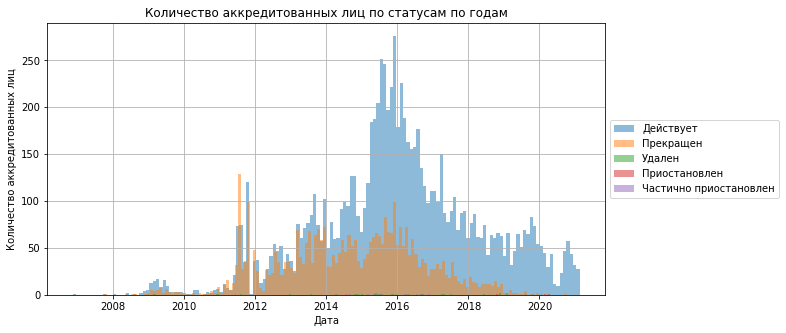

In [23]:
ral.groupby('status')['akkred_order_dat'].hist(
    bins=ral['akkred_order_dat'].dt.to_period('M').nunique(), alpha=0.5, grid=True, figsize=(10, 5))
plt.xlabel('Дата')
plt.ylabel('Количество аккредитованных лиц')
plt.legend(ral.status.unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Количество аккредитованных лиц по статусам по годам')
plt.show()